# Anime Sequel Prediction System (ASPS) Final Project 

Class: CS105

Date: June 6, 2022

Research members: Alejandro Munoz; Chun Ho Wong; Edmund Wong; Yuan Wang; Dong Liu

#Flowchart 
(Chun Ho Wong)





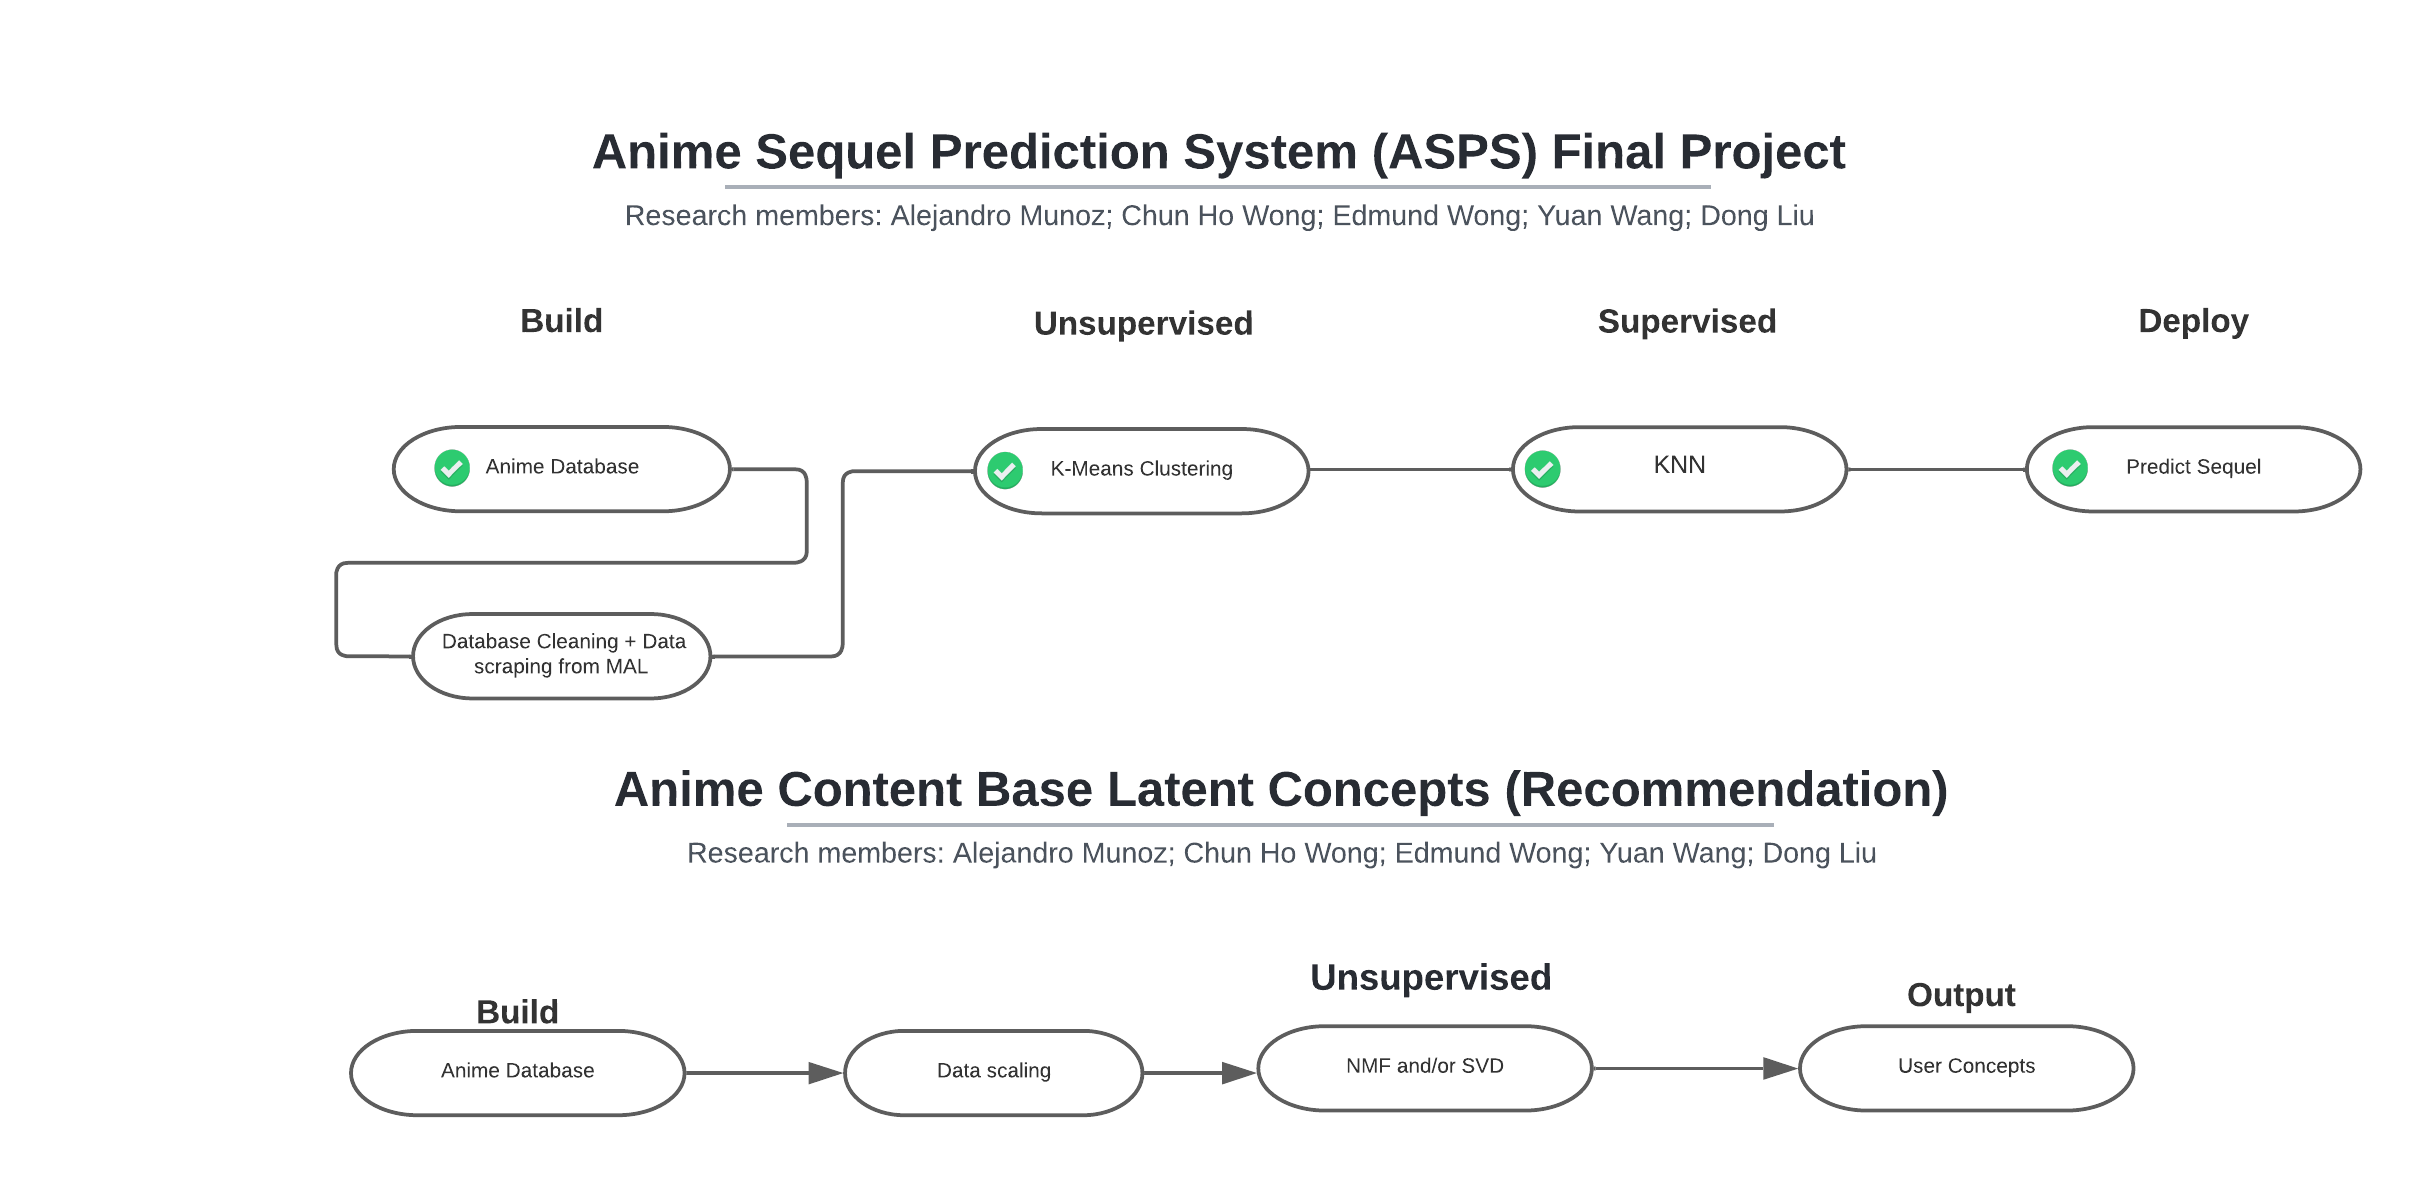

In [ ]:
#import pandas
#pandas.set_option('display.max_rows', None)
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing





#Pearson correlation 
(Yuan Wang)


In [ ]:
df = pd.read_csv("anime.csv")
df = df[~df.Score.str.contains("Unknown")==True]
df = df[~df.Source.str.contains("Unknown")==True]
df = df[~df.Studios.str.contains("Unknown")==True]
df = df[~df.Licensors.str.contains("Unknown")==True]
df = df[~df.Producers.str.contains("Unknown")==True]
df = df[~df.Type.str.contains("Movie")==True]
#df = df[~df.Studios.str.contains(",")==True]
df = df[~df.Episodes.str.contains("1")==True]
df = df[~df.Episodes.str.contains("Unknown")==True]

df['Score'] = df['Score'].astype(float)
df['Episodes'] = df['Episodes'].astype(int)


We need to find out all factors that may impact the ratings(scores).
1.  Genres(category)
2.  Episodes
3.  Producers(category)
4.  Licensors(category)
5.  Studios(category)
6.  Source(category)
7.  Rating
8.  Popularity
9.  Memebers
10. Favorites
11. Watching
12. Completed
13. On-Hold
14. Dropped
15. Plan to Watch

In [ ]:
df.loc[:,'SequelBool'] = 0
df2 = pd.read_csv('sequel_data_final.csv')
df.loc[df.MAL_ID.isin(df2.MAL_ID),['SequelBool']] = df2[['SequelBool']]

df['Genres'] = df['Genres'].astype('category').cat.codes
df['Producers'] = df['Producers'].astype('category').cat.codes
df['Licensors'] = df['Licensors'].astype('category').cat.codes
df['Studios'] = df['Studios'].astype('category').cat.codes
df['Source'] = df['Source'].astype('category').cat.codes
df['Rating'] = df['Rating'].astype('category').cat.codes


corr_table = df.corr(method='pearson')
corr_table = corr_table.iloc[:,[1,17]]
#corr_table = corr_table.sort_values('SequelBool')
print(corr_table)

                  Score  SequelBool
MAL_ID         0.134976   -0.139665
Score          1.000000    0.153937
Genres         0.037585    0.026777
Episodes       0.216766    0.082005
Producers      0.036424    0.063774
Licensors      0.109571   -0.013982
Studios        0.118730    0.022694
Source        -0.128661   -0.046965
Rating        -0.225749   -0.061034
Popularity    -0.722463   -0.209369
Members        0.503194    0.094866
Favorites      0.392784    0.022227
Watching       0.430787    0.037263
Completed      0.454257    0.071537
On-Hold        0.489307    0.100029
Dropped        0.347453    0.081614
Plan to Watch  0.599318    0.170948
SequelBool     0.153937    1.000000


# K-Means 
(Alejandro Munoz)

In [ ]:
anime_data = pd.read_csv("anime.csv")

Dataframe with features needed for kmeans


,Score,Episodes,Ranked,Popularity,Members,Favorites
MAL_ID,,,,,,
1,8.78,26,28.0,39,1251960,61971
6,8.24,26,266.0,201,558913,12944
7,7.27,26,2481.0,1467,94683,587
16,8.06,24,468.0,687,214499,4101
19,8.76,74,30.0,169,614100,29436
...,...,...,...,...,...,...
41694,7.57,13,1369.0,1200,123446,273
41911,6.86,24,4189.0,1709,77864,488
41930,6.86,12,4209.0,920,161314,1816


Dataframe after transforming when normalizing


,0,1,2,3,4,5
0,0.908482,0.046278,0.002500,0.003435,0.483314,0.336956
1,0.787946,0.046278,0.024532,0.018077,0.215603,0.070381
2,0.571429,0.046278,0.229587,0.132502,0.036280,0.003192
3,0.747768,0.042254,0.043233,0.062003,0.082562,0.022298
4,0.904018,0.142857,0.002685,0.015184,0.236920,0.160053
...,...,...,...,...,...,...
1579,0.638393,0.020121,0.126643,0.108369,0.047390,0.001484
1580,0.479911,0.042254,0.387706,0.154375,0.029783,0.002653
1581,0.479911,0.018109,0.389557,0.083062,0.062018,0.009874
1582,0.868304,0.020121,0.006480,0.032990,0.140287,0.049289


[[0.41705172 0.03308706 0.50582768 0.25774547 0.02936321 0.0015426 ]
 [0.66294876 0.04407196 0.13269267 0.08652265 0.13081706 0.03478539]]


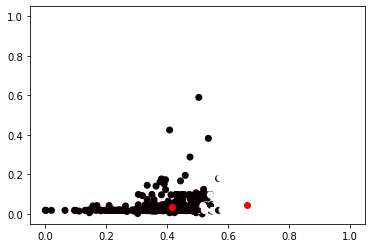

Dataframe with clustered Classes from kmeans


,Score,Episodes,Ranked,Popularity,Members,Favorites,Class
MAL_ID,,,,,,,
1,0.908482,0.046278,0.002500,0.003435,0.483314,0.336956,0
6,0.787946,0.046278,0.024532,0.018077,0.215603,0.070381,0
7,0.571429,0.046278,0.229587,0.132502,0.036280,0.003192,0
16,0.747768,0.042254,0.043233,0.062003,0.082562,0.022298,0
19,0.904018,0.142857,0.002685,0.015184,0.236920,0.160053,0
20,0.714286,0.436620,0.061007,0.000633,0.706808,0.356612,0
22,0.712054,0.352113,0.062396,0.093818,0.054492,0.016986,0
24,0.720982,0.046278,0.057767,0.046367,0.106112,0.027932,0
25,0.604911,0.042254,0.170617,0.115962,0.042866,0.004295,0


In [ ]:
anime_data = pd.read_csv("anime.csv")

# anime_data_new = pd.DataFrame()
# anime_data.head()

# anime_data_new = anime_data_new.set_index('MAL_ID')


# display(anime_data_new)

#remove movies from data
anime_data = anime_data[anime_data['Type'] != 'Movie']

#remove columns that contain 'Unknown' values --- can be several ways to remove unkown either use median value or mean, or some type of regression of values in the column
for(colName, colData) in anime_data.iteritems():
  anime_data = anime_data[anime_data[colName] != 'Unknown']

#display(anime_data)

#score, episodes, ranked, pop, members, fav
anime_data_new = pd.DataFrame()
anime_data_new['MAL_ID'] = anime_data['MAL_ID']
anime_data_new['Score'] = anime_data['Score']
anime_data_new['Episodes'] = anime_data['Episodes']
anime_data_new['Ranked'] = anime_data['Ranked']
anime_data_new['Popularity'] = anime_data['Popularity']
anime_data_new['Members'] = anime_data['Members']
anime_data_new['Favorites'] = anime_data['Favorites']

anime_data_new = anime_data_new.set_index('MAL_ID')

print("Dataframe with features needed for kmeans")
display(anime_data_new)

temp = anime_data_new.values
min_max = preprocessing.MinMaxScaler()
temp_norm = min_max.fit_transform(temp)
anime_normal = pd.DataFrame(temp_norm)

print("Dataframe after transforming when normalizing")
display(anime_normal)

anime_normal_data = anime_normal.values
kmeans = KMeans(n_clusters=2, random_state = 0, n_init = 10, max_iter= 500).fit(anime_normal_data)
centroids = kmeans.cluster_centers_
print(centroids)

labels = kmeans.predict(anime_normal_data)

plt.scatter(anime_normal[0], anime_normal[1], c = kmeans.labels_.astype(float))
plt.scatter(centroids[:,0], centroids[:,1], c = 'red')
plt.show()

data_names = ['Score', 'Episodes', 'Ranked', 'Popularity', 'Members', 'Favorites']
anime_normal.columns = data_names
anime_normal = anime_normal.set_index(anime_data['MAL_ID'])

print("Dataframe with clustered Classes from kmeans")
#pd.Series(predict, index=df.index)
anime_normal['Class'] = pd.Series(labels, index = anime_normal.index)
anime_normal = anime_normal.replace({'Class': {0:1, 1:0}})
anime_normal.head(30)


#Data scraping from MAL <https://myanimelist.net/>   
(Chun Ho Wong)
Takes about 6 mins to run

In [ ]:
anime_normal.loc[:,'SequelBool'] = 0
anime_normal.head()

,Score,Episodes,Ranked,Popularity,Members,Favorites,Class,SequelBool
MAL_ID,,,,,,,,
1,0.908482,0.046278,0.002500,0.003435,0.483314,0.336956,0,0
6,0.787946,0.046278,0.024532,0.018077,0.215603,0.070381,0,0
7,0.571429,0.046278,0.229587,0.132502,0.036280,0.003192,0,0
16,0.747768,0.042254,0.043233,0.062003,0.082562,0.022298,0,0
19,0.904018,0.142857,0.002685,0.015184,0.236920,0.160053,0,0


In [ ]:
for i,row in anime_normal.iterrows():
  url = 'https://myanimelist.net/anime/{}'.format(i)
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}
  anime  = requests.get(url, headers = headers)
  soup = BeautifulSoup(anime.text, 'html.parser')

  for anime_entries in soup.find_all('table', class_='anime_detail_related_anime'):
    if "Sequel" in anime_entries.text:
      anime_normal.at[i,'SequelBool'] = 1

# anime_normal = pd.read_csv("anime_normal.csv")

In [ ]:
anime_normal
# anime_normal.to_csv("anime_normal.csv")

,Score,Episodes,Ranked,Popularity,Members,Favorites,Class,SequelBool
MAL_ID,,,,,,,,
1,0.908482,0.046278,0.002500,0.003435,0.483314,0.336956,0,0
6,0.787946,0.046278,0.024532,0.018077,0.215603,0.070381,0,0
7,0.571429,0.046278,0.229587,0.132502,0.036280,0.003192,0,0
16,0.747768,0.042254,0.043233,0.062003,0.082562,0.022298,0,1
19,0.904018,0.142857,0.002685,0.015184,0.236920,0.160053,0,0
...,...,...,...,...,...,...,...,...
41694,0.638393,0.020121,0.126643,0.108369,0.047390,0.001484,0,0
41911,0.479911,0.042254,0.387706,0.154375,0.029783,0.002653,1,0
41930,0.479911,0.018109,0.389557,0.083062,0.062018,0.009874,1,0


In [ ]:
anime_normal.loc[anime_normal["SequelBool"]==1]

,Score,Episodes,Ranked,Popularity,Members,Favorites,Class,SequelBool
MAL_ID,,,,,,,,
16,0.747768,0.042254,0.043233,0.062003,0.082562,0.022298,0,1
20,0.714286,0.436620,0.061007,0.000633,0.706808,0.356612,0,1
22,0.712054,0.352113,0.062396,0.093818,0.054492,0.016986,0,1
24,0.720982,0.046278,0.057767,0.046367,0.106112,0.027932,0,1
30,0.805804,0.046278,0.019163,0.004790,0.448043,0.387725,0,1
...,...,...,...,...,...,...,...,...
1490,0.546875,0.046278,0.271524,0.447578,0.003461,0.000245,1,1
1519,0.776786,0.018109,0.029069,0.031544,0.146813,0.013740,0,1
1533,0.441964,0.096579,0.457786,0.342191,0.006796,0.000680,1,1


In [ ]:
anime_normal.loc[anime_normal["Class"]==1]

,Score,Episodes,Ranked,Popularity,Members,Favorites,Class,SequelBool
MAL_ID,,,,,,,,
48,0.506696,0.046278,0.341233,0.084870,0.060825,0.007389,1,1
58,0.522321,0.046278,0.319756,0.170372,0.024953,0.002115,1,0
63,0.426339,0.018109,0.488150,0.103489,0.049454,0.002126,1,0
86,0.435268,0.088531,0.473061,0.265727,0.011586,0.000707,1,1
89,0.457589,0.096579,0.428717,0.324205,0.007738,0.000517,1,1
...,...,...,...,...,...,...,...,...
41312,0.479911,0.018109,0.388076,0.143167,0.032578,0.002409,1,0
41392,0.406250,0.018109,0.529717,0.179049,0.023429,0.001849,1,0
41573,0.337054,0.016097,0.672375,0.406001,0.004536,0.000381,1,0


In [ ]:
# anime_normal.loc[anime_normal["Label"]==1  ["SequelBool"]==1]
GoldenAnime = anime_normal[(anime_normal["Class"]==1) & (anime_normal["SequelBool"]==1)]
GoldenAnime.head(10)

,Score,Episodes,Ranked,Popularity,Members,Favorites,Class,SequelBool
MAL_ID,,,,,,,,
48,0.506696,0.046278,0.341233,0.084870,0.060825,0.007389,1,1
86,0.435268,0.088531,0.473061,0.265727,0.011586,0.000707,1,1
89,0.457589,0.096579,0.428717,0.324205,0.007738,0.000517,1,1
133,0.334821,0.018109,0.675986,0.120390,0.040731,0.001430,1,1
157,0.506696,0.046278,0.343177,0.109093,0.046492,0.003268,1,1
174,0.495536,0.042254,0.361970,0.084328,0.060924,0.003518,1,1
196,0.484375,0.018109,0.381596,0.153471,0.029732,0.001044,1,1
225,0.395089,0.122736,0.552953,0.023590,0.182098,0.010211,1,1
241,0.388393,0.016097,0.571098,0.107827,0.047348,0.001789,1,1


In [ ]:
len(GoldenAnime.index)

46

1)Out of the 1584 entries, 629 of them have the potential to have a sequel. (according to K-Means)

2)Out of 1584 entries in our database, 159 of them proven to have a sequel in real world.(according to MAL)

3)Only 45 of them actually have a sequel in real world. (Both)

Our model is overestimating the chance of having a sequel, not to worry, we would make a KNN that take this K-Means output into consideration


We would swtich to Superviced Learning KNN with the following features. 

Rating (Higher the better)

Popularity

Watching + Completed + Plan to Watch (Higher the better) 


In [ ]:
anime_normal.head(10)

,Score,Episodes,Ranked,Popularity,Members,Favorites,Class,SequelBool
MAL_ID,,,,,,,,
1,0.908482,0.046278,0.002500,0.003435,0.483314,0.336956,0,0
6,0.787946,0.046278,0.024532,0.018077,0.215603,0.070381,0,0
7,0.571429,0.046278,0.229587,0.132502,0.036280,0.003192,0,0
16,0.747768,0.042254,0.043233,0.062003,0.082562,0.022298,0,1
19,0.904018,0.142857,0.002685,0.015184,0.236920,0.160053,0,0
20,0.714286,0.436620,0.061007,0.000633,0.706808,0.356612,0,1
22,0.712054,0.352113,0.062396,0.093818,0.054492,0.016986,0,1
24,0.720982,0.046278,0.057767,0.046367,0.106112,0.027932,0,1
25,0.604911,0.042254,0.170617,0.115962,0.042866,0.004295,0,0


#Pearson correlation Rerun 
(To figure out what features is important when real world data is taken into consideration) 
(Chun Ho Wong) (Yuan Wang)

In [ ]:
df2 = pd.read_csv("anime_normal.csv")
df2['SequelBool'] = df2['SequelBool'].astype('category').cat.codes
corr_table1 = df2.corr(method='pearson')
corr_table2 = corr_table1.sort_values('SequelBool')
# corr_table2 = corr_table1.sort_values('Scoredlabel')
print(corr_table2)

              MAL_ID     Score  Episodes    Ranked  Popularity   Members  \
MAL_ID      1.000000 -0.092006 -0.240198  0.117971   -0.244896  0.107059   
Ranked      0.117971 -0.967545 -0.135162  1.000000    0.498691 -0.422444   
Class       0.025967 -0.772571 -0.086514  0.817024    0.565541 -0.402732   
Members     0.107059  0.499161  0.117189 -0.422444   -0.552123  1.000000   
Favorites  -0.026687  0.431316  0.226414 -0.311777   -0.294161  0.798699   
Popularity -0.244896 -0.502444  0.028456  0.498691    1.000000 -0.552123   
Score      -0.092006  1.000000  0.144425 -0.967545   -0.502444  0.499161   
Episodes   -0.240198  0.144425  1.000000 -0.135162    0.028456  0.117189   
SequelBool -0.365281  0.110135  0.258081 -0.118445    0.029621 -0.051517   

            Favorites     Class  SequelBool  
MAL_ID      -0.026687  0.025967   -0.365281  
Ranked      -0.311777  0.817024   -0.118445  
Class       -0.245746  1.000000   -0.076569  
Members      0.798699 -0.402732   -0.051517  
Favorites

We able to find that Episodes and Score, pipularity have correlation with if a show having a sequel or no. We would use those in our KNN model.

#KNN [Implementation] 

Main: (Edmund Wong; Dong Liu) 

Supportive:(Alejandro Munoz, Chun Ho Wong)

In [ ]:
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

anime_normal.head(10)

,Score,Episodes,Ranked,Popularity,Members,Favorites,Class,SequelBool
MAL_ID,,,,,,,,
1,0.908482,0.046278,0.002500,0.003435,0.483314,0.336956,0,0
6,0.787946,0.046278,0.024532,0.018077,0.215603,0.070381,0,0
7,0.571429,0.046278,0.229587,0.132502,0.036280,0.003192,0,0
16,0.747768,0.042254,0.043233,0.062003,0.082562,0.022298,0,1
19,0.904018,0.142857,0.002685,0.015184,0.236920,0.160053,0,0
20,0.714286,0.436620,0.061007,0.000633,0.706808,0.356612,0,1
22,0.712054,0.352113,0.062396,0.093818,0.054492,0.016986,0,1
24,0.720982,0.046278,0.057767,0.046367,0.106112,0.027932,0,1
25,0.604911,0.042254,0.170617,0.115962,0.042866,0.004295,0,0


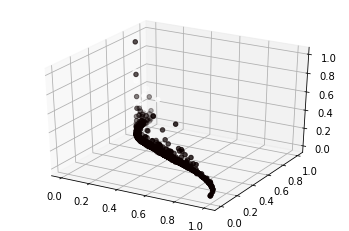

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
First_iteration_df = anime_normal

ax = plt.axes(projection='3d')
ydata = First_iteration_df["Score"]
zdata = First_iteration_df["Episodes"]
xdata = First_iteration_df["Ranked"]
cdata = First_iteration_df["SequelBool"]
graphoutput = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap=plt.hot())
plt.show()
#Just a 3D representation of KNN, but our KNN is considering 7 features at the same time. This is just a show case
#This is what it looks like when we consider the first few columns : Score,Episodes,Ranked; with C = SequelBool. 

In [ ]:
#split dataset
X = anime_normal.iloc[:, 0:7].values  # all the row, only 0-6 columns (features)
y = anime_normal.iloc[:, 7].values # just the "answer" (SequelBool)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
math.sqrt(len(y_test)) # this is to find the best k 

17.804493814764857

In [ ]:
#KNN implementation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=17, p=2, metric='euclidean')
classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

# TP | FN
# FP | TN

[[279   3]
 [ 32   3]]


In [ ]:
print(f1_score(y_test, y_pred))

0.14634146341463414


In [ ]:
print(accuracy_score(y_test, y_pred))

0.889589905362776


In [ ]:
anime_normal.head(10)

,Score,Episodes,Ranked,Popularity,Members,Favorites,Class,SequelBool
MAL_ID,,,,,,,,
1,0.908482,0.046278,0.002500,0.003435,0.483314,0.336956,0,0
6,0.787946,0.046278,0.024532,0.018077,0.215603,0.070381,0,0
7,0.571429,0.046278,0.229587,0.132502,0.036280,0.003192,0,0
16,0.747768,0.042254,0.043233,0.062003,0.082562,0.022298,0,1
19,0.904018,0.142857,0.002685,0.015184,0.236920,0.160053,0,0
20,0.714286,0.436620,0.061007,0.000633,0.706808,0.356612,0,1
22,0.712054,0.352113,0.062396,0.093818,0.054492,0.016986,0,1
24,0.720982,0.046278,0.057767,0.046367,0.106112,0.027932,0,1
25,0.604911,0.042254,0.170617,0.115962,0.042866,0.004295,0,0


In [ ]:
test =pd.read_csv("test.csv")
test.head()

,MAL_ID,Score,Episodes,Ranked,Popularity,Members,Favorites,Name
0,50273,7.40,12,2056,1219,158773,1213,Tomodachi Game
1,43735,6.42,24,6828,4194,20076,115,Cue!
2,50175,7.09,12,3514,1289,14386,1126,"Yuusha, Yamemasu"


#Testing 

(Yuan Wang)

In [ ]:
def normalized_df(old_df, new_df, data_names):
  min_old = old_df.min(axis = 0)
  max_old = old_df.max(axis = 0)
  temp = old_df.values
  temp2 = new_df.values

  for i in range(len(new_df)):
    for j in range(1, len(data_names)):
      temp2[i][j-1] = (float(temp2[i][j-1]) - float(min_old[data_names[j]])) / (float(max_old[data_names[j]]) - float(min_old[data_names[j]]))
      #print(min_old[data_names[j]])

  df = pd.DataFrame(temp2, columns = data_names[1:])

  return df
  #end function

#pass in column names that is used in order (like what we have for other dataframes)
column_names = ['MAL_ID', 'Score', 'Episodes', 'Ranked', 'Popularity', 'Members', 'Favorites']

#read in data
test = pd.read_csv("test.csv")
#if MAL_ID is not index please set to index
test = test.set_index('MAL_ID')
#remove unnecessary columns
test = test.drop(['Name'], axis = 1)
#function return dataframe with normalized values 
new_test = normalized_df(anime_data_new, test, column_names)
#set a new column with the index of test
#new_test['MAL_ID'] = test.index
#set the new column as index for new dataframe
#new_test = new_test.set_index('MAL_ID')
print(new_test)
new_test = new_test.reset_index()
new_test = scaler.transform(new_test)
new_pred = classifier.predict(new_test)
new_pred

      Score  Episodes    Ranked  Popularity   Members  Favorites
0  0.600446  0.022472  0.206201    0.110087  0.061036   0.006595
1  0.381696  0.157303  0.685029    0.378977  0.007460   0.000625
2  0.531250  0.022472  0.352498    0.116414  0.005262   0.006122


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 1])

#Latent Concepts (Recommendation) 
(Alejandro Munoz)

In [ ]:
from sklearn.decomposition import NMF
data = pd.read_csv("rating_complete.csv", nrows = 500000)
anime = pd.read_csv("anime.csv")
anime = anime.rename(columns = {'MAL_ID': 'anime_id'})
table = pd.pivot_table(data, values = ['rating'], index = ['anime_id'], columns = ['user_id'], fill_value = 0)
t = table.to_numpy()

In [ ]:
#svd
u, sigma, v_t = np.linalg.svd(t, full_matrices = True)

#SVD VS K

(0.1, 1000)

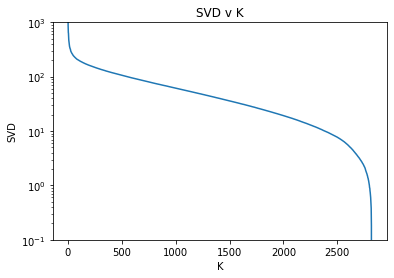

In [ ]:
plt.plot(sigma)
plt.yscale("log")
plt.title("SVD v K")
plt.xlabel("K")
plt.ylabel("SVD")
plt.ylim([.1, 1000])

#Getting Recommendations

In [ ]:
def print_concepts(U,num_of_concepts,top_anime):
    top_rate_index = []
    #iterate through the number of concepts desired
    for j in range(num_of_concepts):
        print("Concept: ", j+1)
        col = U[:,j]
        col = np.absolute(col)
        
        #get the n number of ith largest element from concept col vector, corresponding to the ith movie index 
        top_rate_index = (-col).argsort()[:top_anime]
       
        #use the index to get the true animeID
        for i in top_rate_index:
            anime_id = table.index[i]
            
            out = anime.loc[anime['anime_id'] == anime_id]
            out = pd.DataFrame(out, columns = ['Name', 'Genres']).to_numpy()
            
            for k in range(len(out)):
                for l in range(len(out[k])):
                    print(out[k][l], end = " ")     
            print()
            
###end print_concepts function

In [ ]:
print_concepts(u, 10, 5)

Concept:  1
Shingeki no Kyojin Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen 
Death Note Mystery, Police, Psychological, Supernatural, Thriller, Shounen 
Fullmetal Alchemist: Brotherhood Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen 
One Punch Man Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural 
Angel Beats! Action, Comedy, Drama, School, Supernatural 
Concept:  2
Boku no Hero Academia 2nd Season Action, Comedy, Super Power, School, Shounen 
Boku no Hero Academia Action, Comedy, School, Shounen, Super Power 
Re:Zero kara Hajimeru Isekai Seikatsu Psychological, Drama, Thriller, Fantasy 
Koe no Katachi Drama, School, Shounen 
Kimetsu no Yaiba Action, Demons, Historical, Shounen, Supernatural 
Concept:  3
Sen to Chihiro no Kamikakushi Adventure, Supernatural, Drama 
Death Note Mystery, Police, Psychological, Supernatural, Thriller, Shounen 
Howl no Ugoku Shiro Adventure, Drama, Fantasy, Romance 
Mononoke Hime Action, Adventure, Fantasy 
Fu

In [ ]:
#nmf
model = NMF(n_components = 5, init = 'random', random_state = 0, max_iter = 500)
u = model.fit_transform(t)

In [ ]:
print_concepts(u, 5, 5)

Concept:  1
Boku wa Tomodachi ga Sukunai Ecchi, Slice of Life, Comedy, Harem, Romance, School 
Kore wa Zombie Desu ka? Action, Comedy, Ecchi, Harem, Magic, Supernatural 
Boku wa Tomodachi ga Sukunai Next Harem, Slice of Life, Comedy, Romance, School 
Sakura-sou no Pet na Kanojo Slice of Life, Comedy, Drama, Romance, School 
Ore no Imouto ga Konnani Kawaii Wake ga Nai Slice of Life, Comedy 
Concept:  2
Shingeki no Kyojin Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen 
Death Note Mystery, Police, Psychological, Supernatural, Thriller, Shounen 
One Punch Man Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural 
Boku no Hero Academia Action, Comedy, School, Shounen, Super Power 
Fullmetal Alchemist: Brotherhood Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen 
Concept:  3
Fullmetal Alchemist Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen 
Code Geass: Hangyaku no Lelouch Action, Military, Sci-Fi, Super Power, Drama, Mecha, School